# Importing required libraries

In [1]:
# Trivial libraries.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# Additional libraries.

#!python -m pip install -U gensim


# Importing and preprocessing the dataset

In [3]:
# Importing the crawled dataset.

df = pd.read_csv('.//Datasets//Books.csv')
df


,Name,Author,ISBN,Rating,Text,Summary
0,Sum: Forty Tales from the Afterlives,David Eagleman,0307377342,10,There are three deaths. The first is when the ...,Awesomely creative think-piece. 40 very short ...
1,On Writing Well,William Zinsser,0060891548,10,The essence of writing is rewriting. Just beca...,Great blunt advice about writing better non-fi...
2,"Mindwise: How We Understand What Others Think,...",Nicholas Epley,0307595919,10,"“The only true voyage of discovery, the only f...","Many new brilliant insights, especially about ..."
3,The War of Art,Steven Pressfield,0446691437,10,It’s not the writing part that’s hard. What’s ...,Have you experienced a vision of the person yo...
4,"Thinking, Fast and Slow",Daniel Kahneman,66157471,10,The title of the book refers to two modes of t...,If you liked “Predictably Irrational” or “Stum...
...,...,...,...,...,...,...
287,Seeing What Others Don't,Gary Klein,1610392515,0,The fancy new BMW in front of them: The driver...,"I really wanted to like this book, but couldn'..."
288,Flex: Do Something Different,Ben Fletcher and Karen Pine,1907396543,0,Personalities fit into certain categories: agr...,I give the basic idea a 9-out-of-10 rating: th...
289,Cambodia's Curse,Joel Brinkley,1586487876,0,Cambodia's Curse: The Modern History of a Trou...,Cambodia's political history from 1978 to 2009...
290,Conspiracy of the Rich,ert Kiyosaki,0446559806,0,Conspiracy of the Rich - Robert Kiyosaki The n...,Yet another Rich Dad book shat out for the usu...


In [4]:
# Drop the NaN rows.

df.dropna(inplace = True)
df


,Name,Author,ISBN,Rating,Text,Summary
0,Sum: Forty Tales from the Afterlives,David Eagleman,0307377342,10,There are three deaths. The first is when the ...,Awesomely creative think-piece. 40 very short ...
1,On Writing Well,William Zinsser,0060891548,10,The essence of writing is rewriting. Just beca...,Great blunt advice about writing better non-fi...
2,"Mindwise: How We Understand What Others Think,...",Nicholas Epley,0307595919,10,"“The only true voyage of discovery, the only f...","Many new brilliant insights, especially about ..."
3,The War of Art,Steven Pressfield,0446691437,10,It’s not the writing part that’s hard. What’s ...,Have you experienced a vision of the person yo...
4,"Thinking, Fast and Slow",Daniel Kahneman,66157471,10,The title of the book refers to two modes of t...,If you liked “Predictably Irrational” or “Stum...
...,...,...,...,...,...,...
287,Seeing What Others Don't,Gary Klein,1610392515,0,The fancy new BMW in front of them: The driver...,"I really wanted to like this book, but couldn'..."
288,Flex: Do Something Different,Ben Fletcher and Karen Pine,1907396543,0,Personalities fit into certain categories: agr...,I give the basic idea a 9-out-of-10 rating: th...
289,Cambodia's Curse,Joel Brinkley,1586487876,0,Cambodia's Curse: The Modern History of a Trou...,Cambodia's political history from 1978 to 2009...
290,Conspiracy of the Rich,ert Kiyosaki,0446559806,0,Conspiracy of the Rich - Robert Kiyosaki The n...,Yet another Rich Dad book shat out for the usu...


In [5]:
# Removing stop words and tokenizing the text for Title column.

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

df['Text'] = df['Text'].astype(str)
s = df['Text']
stop_words = stopwords.words('english')
filtered_reviews = []

for text in s:
    word_tokens = word_tokenize(text)
    word_tokens
    filtered_sentence = [w for w in word_tokens if not w in stop_words]
    filtered_reviews.append(filtered_sentence)
    
filtered_reviews

# Finding the stems of the Title column.
from nltk import PorterStemmer

ps=PorterStemmer()
stemmed_reviews=[]

for text in filtered_reviews:
    L=[]
    for w in text:
        L.append(ps.stem(w))
    stemmed_reviews.append(L)
    
stemmed_reviews

# Creating a column of cleaned reviews and reappending it to the dataframe.
clean=[]
for text in stemmed_reviews:
    st=""
    for w in text:
        st=st+w+" "
    clean.append(st)

df['Text'] = [rev for rev in clean]

# Removing the punctuations.
df['Text'] = df['Text'].str.replace("[^a-zA-Z#]"," ")


In [6]:
# Removing stop words and tokenizing the text for Summary column.

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

df['Summary'] = df['Summary'].astype(str)
s = df['Summary']
stop_words = stopwords.words('english')
filtered_reviews = []

for text in s:
    word_tokens = word_tokenize(text)
    word_tokens
    filtered_sentence = [w for w in word_tokens if not w in stop_words]
    filtered_reviews.append(filtered_sentence)
    
filtered_reviews

# Finding the stems of the Title column.
from nltk import PorterStemmer

ps=PorterStemmer()
stemmed_reviews=[]

for text in filtered_reviews:
    L=[]
    for w in text:
        L.append(ps.stem(w))
    stemmed_reviews.append(L)
    
stemmed_reviews

# Creating a column of cleaned reviews and reappending it to the dataframe.
clean=[]
for text in stemmed_reviews:
    st=""
    for w in text:
        st=st+w+" "
    clean.append(st)

df['Summary'] = [rev for rev in clean]

# Removing the punctuations.
df['Summary'] = df['Summary'].str.replace("[^a-zA-Z#]"," ")


In [7]:
# Sample look at out dataframe.

df


,Name,Author,ISBN,Rating,Text,Summary
0,Sum: Forty Tales from the Afterlives,David Eagleman,0307377342,10,there three death the first bodi ceas functi...,awesom creativ think piec short fiction s...
1,On Writing Well,William Zinsser,0060891548,10,the essenc write rewrit just write fluentl...,great blunt advic write better non fict So i...
2,"Mindwise: How We Understand What Others Think,...",Nicholas Epley,0307595919,10,the true voyag discoveri fountain etern yo...,mani new brilliant insight especi over estim...
3,The War of Art,Steven Pressfield,0446691437,10,It write part hard what hard sit write...,have experienc vision person might becom wor...
4,"Thinking, Fast and Slow",Daniel Kahneman,66157471,10,the titl book refer two mode think refer ...,If like predict irrat stumbl happi pop...
...,...,...,...,...,...,...
287,Seeing What Others Don't,Gary Klein,1610392515,0,the fanci new bmw front the driver took long...,I realli want like book could n t stomach wr...
288,Flex: Do Something Different,Ben Fletcher and Karen Pine,1907396543,0,person fit certain categori agreeabl consc...,I give basic idea out of rate n t decla...
289,Cambodia's Curse,Joel Brinkley,1586487876,0,cambodia s curs the modern histori troubl l...,cambodia s polit histori appal ...
290,Conspiracy of the Rich,ert Kiyosaki,0446559806,0,conspiraci rich robert kiyosaki the name gam...,yet anoth rich dad book shat usual audienc n t...


In [8]:
# Make copies for our models.

df1 = df.copy(deep=True)
df2 = df.copy(deep=True)
safe_copy = df.copy(deep=True)


# Plagiarism Detection Model (doc2vec)

In [9]:
# Make training and testing dictionaries from the dataframe. (80-20)

train_docs = dict()
test_docs = dict()

for i in range(len(df1)):
    train_docs[df1.iloc[i, 0]] = df1.iloc[i, 4]
        

In [10]:
# Create the training and testing document dictionaries.
# Training dictionary values have to be in the 'TaggedDocument' format for inputting in the doc2vec model of gensim.
# Testing dictionary values have to be in the list of tokens format for inputting in the doc2vec model of gensim.

import gensim

doc_tagged_train = dict()
doc_untagged_test = dict()

offset = 0
for k, v in train_docs.items():    
    doc_tagged_train[k] = [gensim.models.doc2vec.TaggedDocument(gensim.utils.simple_preprocess(v), [offset])]
    offset += 1

train_corpus = [taggeddoc for taggeddoc_list in list(doc_tagged_train.values()) for taggeddoc in taggeddoc_list]


C:\Users\YASH\Anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [11]:
# Make the model, build the vocabulary, and train the model.

model = gensim.models.doc2vec.Doc2Vec(vector_size=30, min_count=2, epochs=50, window=2)
model.build_vocab(train_corpus)
model.train(train_corpus, total_examples=model.corpus_count, epochs=model.epochs)


In [12]:
# Getting the inference vector of a document. 

print('\nSample Inference Vector of the Plagiarism Detection Model\n')    

vector = model.infer_vector(train_corpus[0].words)
vector



Sample Inference Vector of the Plagiarism Detection Model



array([ 0.3693215 ,  1.4609154 , -2.656208  ,  1.2199911 , -1.8133079 ,
        1.7914529 , -3.5830002 ,  2.003061  ,  0.801853  , -1.2569577 ,
        0.5068193 ,  2.319559  ,  0.86454844,  1.5534222 ,  0.08989988,
       -0.87863404, -0.20709199,  1.5046729 , -1.1270137 , -1.1634047 ,
       -4.443301  , -1.0964525 , -0.96788126, -0.14246264,  1.2790273 ,
        1.1092778 , -1.3839891 ,  0.7558468 , -0.5091084 ,  0.43326637],
      dtype=float32)

In [13]:
# Checking model performance on the training docs itself.

import collections

ranks = []
second_ranks = []

for doc_id in range(len(train_corpus)):
    inferred_vector = model.infer_vector(train_corpus[doc_id].words)
    sims = model.dv.most_similar([inferred_vector], topn=len(model.dv))
    rank = [docid for docid, sim in sims].index(doc_id)
    ranks.append(rank)
    second_ranks.append(sims[1])

print('\nAccuracy of the Plagiarism Detection Model\n\n')    

print('Classification of documents')
counter = collections.Counter(ranks)
print(counter)

total = 0
acc_scores = [list(i) for i in counter.items()]

for i in acc_scores:
    total += i[1]
    
print('\n\nThe accurarcy of the model')
print(acc_scores[0][1]/total * 100, '\n')



Accuracy of the Plagiarism Detection Model


Classification of documents
Counter({0: 291})


The accurarcy of the model
100.0 



In [14]:
# Get similarity between any two documents in the corpus.

print('\nSample Predicted Plagirism Index of the Plagiarism Detection Model\n\n')    

similarity = model.similarity_unseen_docs(train_corpus[0].words, train_corpus[279].words)
print(similarity, '\n')



Sample Predicted Plagirism Index of the Plagiarism Detection Model


0.20024927 




Enter the document number to check for similarity
45


Top 10 most plagrised documents wrt Document - 45 are as follows
[(82, 0.8375168442726135), (167, 0.7982004880905151), (268, 0.796043872833252), (125, 0.7783817648887634), (206, 0.7105993628501892), (130, 0.7073106169700623), (254, 0.6842080354690552), (129, 0.6713662147521973), (51, 0.6550653576850891), (252, 0.6395367383956909)]


The scatter plot of plagarism indices wrt Document - 45 is as follows



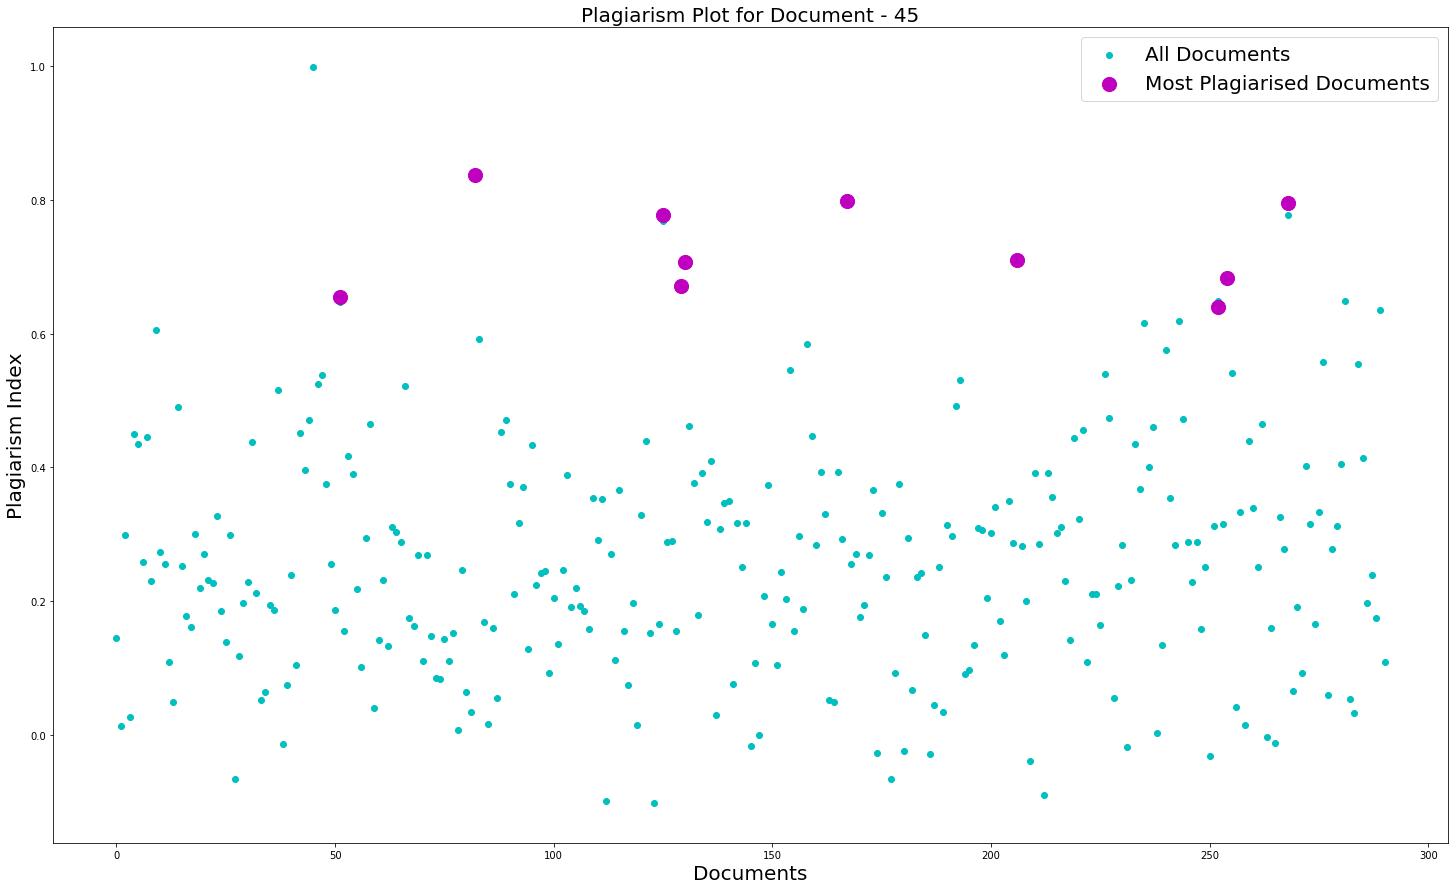

In [15]:
# Plotting document similarities according to an input document.
# Right now just doing a SCATTERPLOT. Can even cluster them. Try LATER if time.

print('\nEnter the document number to check for similarity')
check = int(input())

print('\n\nTop 10 most plagrised documents wrt Document -', check, 'are as follows')
similar_doc = model.dv.most_similar([check], topn=10)
print(similar_doc)

documents = []
cossim = []
closestdocs = []
closestcossim = []


for i in range(len(train_corpus)):
    documents.append(i)
    cossim.append(model.similarity_unseen_docs(train_corpus[check].words, train_corpus[i].words))

closestpoints = model.dv.most_similar([check], topn=10)
for i in range(len(closestpoints)):
    closestdocs.append(closestpoints[i][0])
    closestcossim.append(closestpoints[i][1])
    

print('\n\nThe scatter plot of plagarism indices wrt Document -', check, 'is as follows\n')
plt.figure(figsize=(25, 15))
plt.scatter(documents, cossim, color = 'c', label = 'All Documents')
plt.scatter(closestdocs, closestcossim, color = 'm', s=200, label = 'Most Plagiarised Documents')
plt.title('Plagiarism Plot for ' + 'Document - ' + str(check), fontsize=20)
plt.xlabel('Documents', fontsize=20)
plt.ylabel('Plagiarism Index', fontsize=20)
plt.legend(loc = 'best', prop={'size': 20})
plt.show()


# Similar Document Clustering Model

In [16]:
# Construct our dataset from previous model's similarity measures'.
# As an example, we've taken the similarity index wrt the 'check' document.

df1_cont = pd.DataFrame(columns = ['Documents', 'Similarity Index'])
df1_cont['Documents'] = documents
df1_cont['Similarity Index'] = cossim
df1_cont


,Documents,Similarity Index
0,0,0.145241
1,1,0.013250
2,2,0.299010
3,3,0.026869
4,4,0.450524
...,...,...
286,286,0.197676
287,287,0.239133
288,288,0.174190
289,289,0.635890


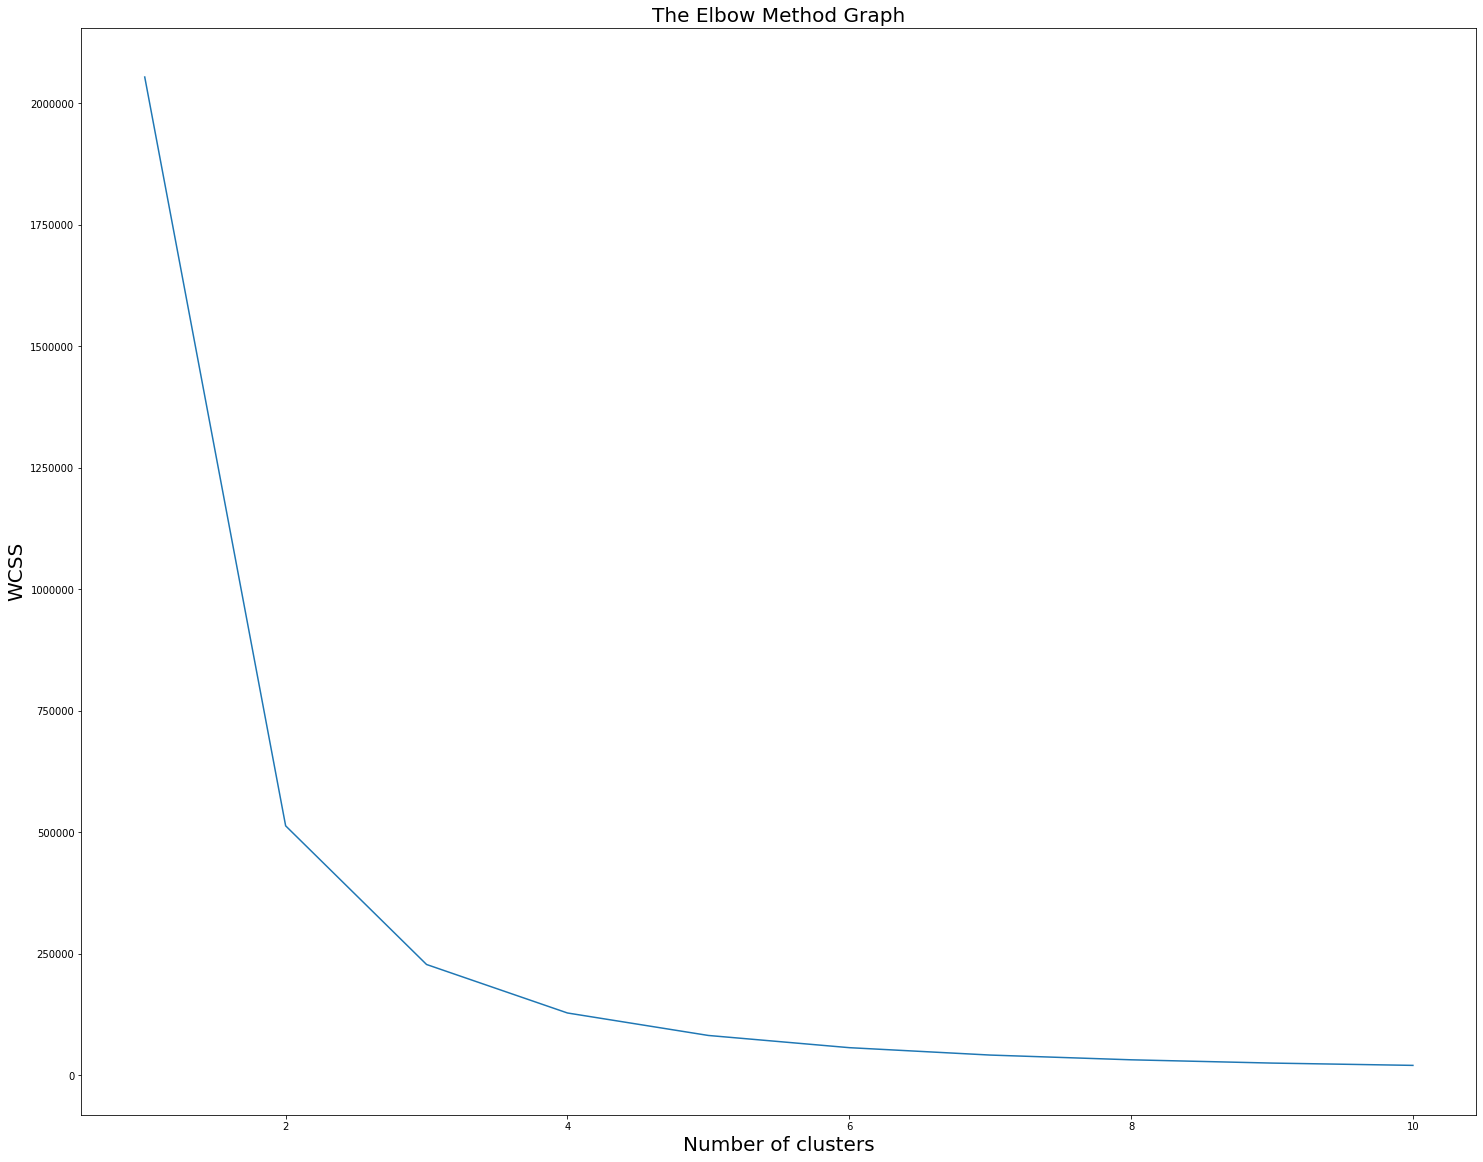

In [17]:
# Using the elbow method to get the optimum number of clusters.

from sklearn.cluster import KMeans

wcss=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init ='k-means++', max_iter=300,  n_init=10,random_state=0 )
    kmeans.fit(df1_cont)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(25, 20))
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method Graph', fontsize=20)
plt.xlabel('Number of clusters', fontsize=20)
plt.ylabel('WCSS', fontsize=20)
plt.show()


In [18]:
# Perform K-Means Clustering of the data & predict the cluster labels.

kmeans = KMeans(n_clusters=3, init ='k-means++', max_iter=300, n_init=10,random_state=0 )
y_kmeans = kmeans.fit_predict(df1_cont)



The cluster assignments are

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


The scatter plots for the clusters is


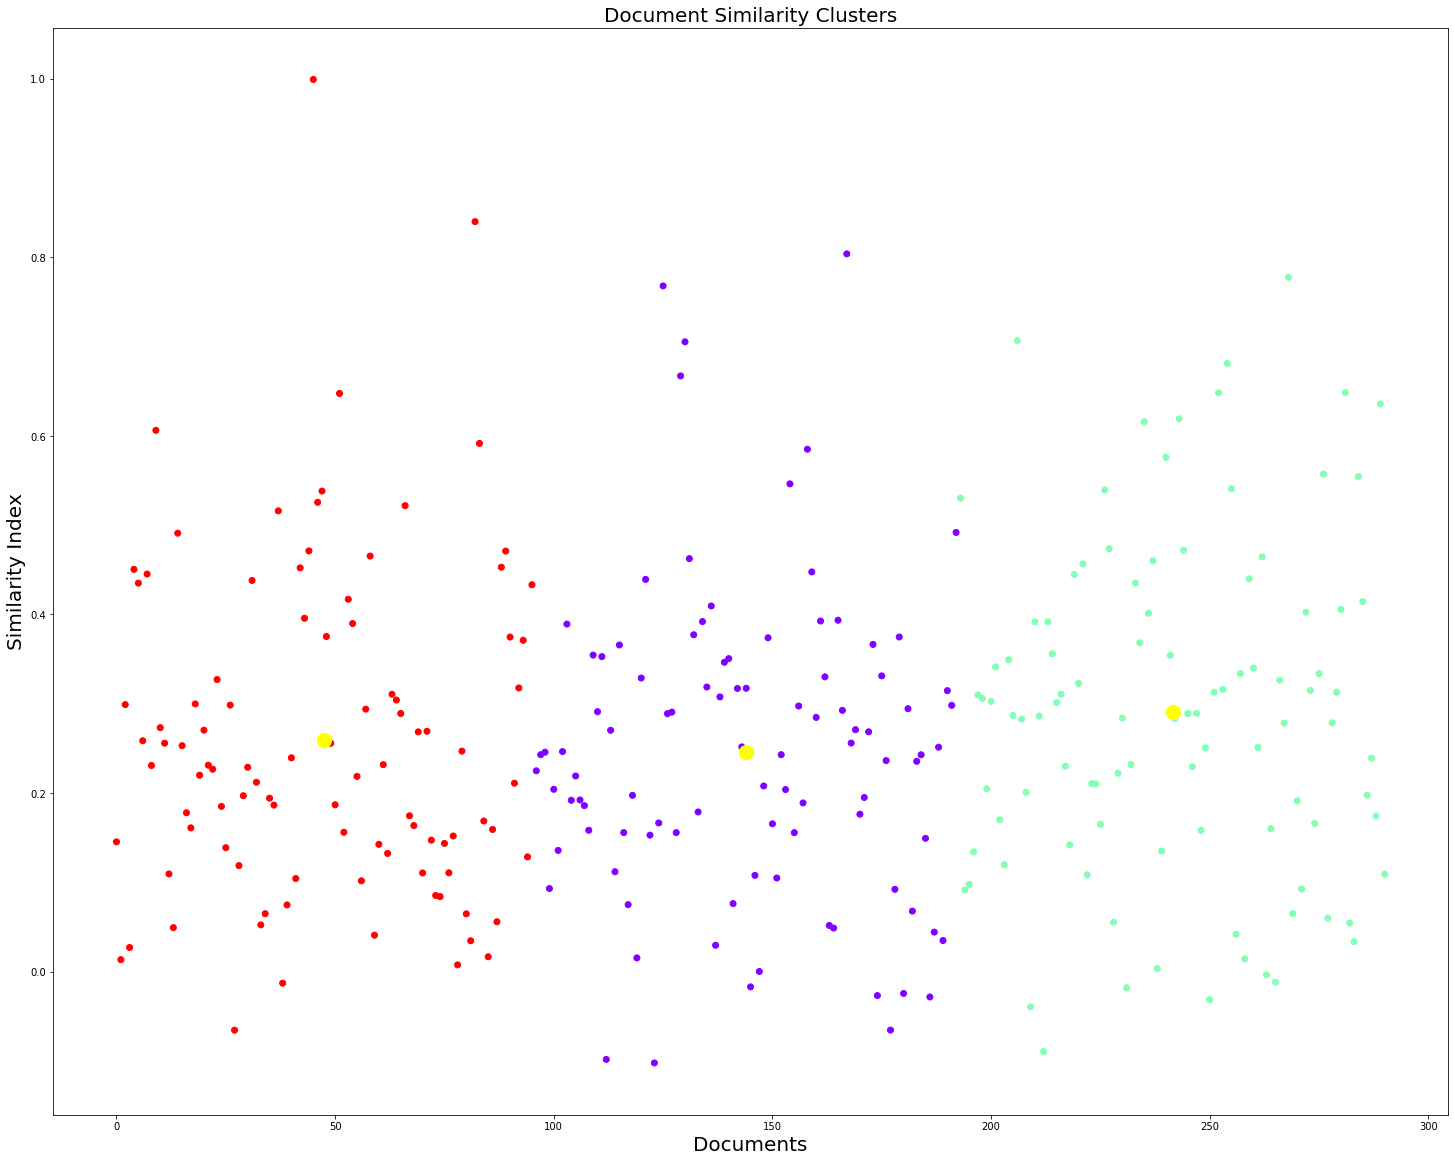

In [19]:
# Display the cluster assignments and visualize the clusters.

print('\nThe cluster assignments are\n')
print(y_kmeans)

print('\n\nThe scatter plots for the clusters is')
plt.figure(figsize=(25, 20))
plt.scatter(df1_cont.iloc[:, 0], df1_cont.iloc[:, 1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='yellow', label = 'Centroids')
plt.title('Document Similarity Clusters', fontsize=20)
plt.xlabel('Documents', fontsize=20)
plt.ylabel('Similarity Index', fontsize=20)
plt.show()


# Abstractive Summary Generation Model (seq2seq)

In [20]:
# In case, we want to revert back.

#df2 = safe_copy.copy(deep=True)


In [21]:
# Dataset preprocessing for seq2seq model.

# Reduce 'Text' column entries to max 500 length.
for i in range(len(df2['Text'])):
    df2.iloc[i, 4] = df2.iloc[i, 4][:300]

# Add 5000 rows in total by repeating the already added 292 rows.
for i in range(292, 5000):
    newindex = i % 292
    df2.loc[i] = list(df2.iloc[newindex, :])
    
# Shuffle the dataframe.
df2 = df2.sample(frac=1)

# Reset the index and drop exisiting index column.
df2.reset_index(inplace = True)
df2.drop(['index'], axis=1, inplace = True)

df2


,Name,Author,ISBN,Rating,Text,Summary
0,The Drunkard's Walk: How Randomness Rules Our ...,Leonard Mlodinow,9780307275172,3,We creat view world employ filter process perc...,I thought philosophi random turn math probab...
1,The Icarus Deception,Seth Godin,1591846072,8,It far danger fli low high feel safe fli l...,veri interest seth move talk busi talk artis...
2,Outliers: The Story of Success,Malcolm Gladwell,0316017922,5,the strike thing ericsson studi colleagu f...,deep studi peopl much success often due circ...
3,Cut to the Chase,Stuart Levine,0385516207,5,whether re write report letter present ...,tip effect commun
4,The How of Happiness,Sonja Lyubomirsky,159420148X,6,what mean mysteri happi Is possibl acquir ...,sinc I love stumbl happi I prepar love big...
...,...,...,...,...,...,...
4995,Complexity: A Guided Tour,Melanie Mitchell,0199798109,2,A definit term complex system system larg ne...,great I m embarrass admit went head I m ...
4996,I Will Teach You To Be Rich,Ramit Sethi,0761147489,7,If good credit call credit card lender per y...,An amaz book consum financ healthi approach ma...
4997,Art and Fear,David Bayles and Ted Orland,0961454733,8,thi book feel like sit studio classroom whee...,for artist musician beauti insight creativ p...
4998,"Mindwise: How We Understand What Others Think,...",Nicholas Epley,0307595919,10,the true voyag discoveri fountain etern yo...,mani new brilliant insight especi over estim...


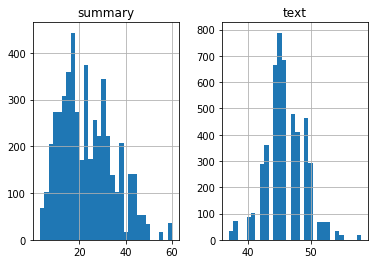

In [22]:
# See the 'Text' & 'Summary' column histograms.

text_word_count = []
summary_word_count = []

# populate the lists with sentence lengths
for i in df2['Text']:
      text_word_count.append(len(i.split()))

for i in df2['Summary']:
      summary_word_count.append(len(i.split()))

length_df = pd.DataFrame({'text':text_word_count, 'summary':summary_word_count})

length_df.hist(bins = 30)
plt.show()


In [23]:
# Snippet to check how many terms a particular interval covers.
# Select it such that ~90% values are covered.

cnt=0
for i in df2['Text']:
    if(len(i.split())<=50):
        cnt=cnt+1
print(cnt/len(df2['Text']))

cnt=0
for i in df2['Summary']:
    if(len(i.split())<=40):
        cnt=cnt+1
print(cnt/len(df2['Summary']))


0.9454
0.906


In [24]:
# Set the maximum 'Text' & 'Summary' length according to previous snippet.

max_text_len = 50
max_summary_len = 40


In [25]:
# Make a new dataframe only from 'Text' and 'Summary' columns.

cleaned_text = np.array(df2['Text'])
cleaned_summary = np.array(df2['Summary'])
titles = np.array(df2['Name'])

short_text = []
short_summary = []
selected_titles = []

for i in range(len(cleaned_text)):
    if(len(cleaned_summary[i].split())<=max_summary_len and len(cleaned_text[i].split())<=max_text_len):
        short_text.append(cleaned_text[i])
        short_summary.append(cleaned_summary[i])
        selected_titles.append(titles[i])
        
df2_new =pd.DataFrame({'Name': selected_titles, 'Text': short_text, 'Summary': short_summary})
df2_new


,Name,Text,Summary
0,The Drunkard's Walk: How Randomness Rules Our ...,We creat view world employ filter process perc...,I thought philosophi random turn math probab...
1,Outliers: The Story of Success,the strike thing ericsson studi colleagu f...,deep studi peopl much success often due circ...
2,Cut to the Chase,whether re write report letter present ...,tip effect commun
3,The How of Happiness,what mean mysteri happi Is possibl acquir ...,sinc I love stumbl happi I prepar love big...
4,The Magic of Thinking Big,belief I m posit I attitud gener po...,A classic self help book exactli d expect ...
...,...,...,...
4252,Homo Deus,more peopl die today eat much eat littl more...,veri interest altern perspect life historian ...
4253,Complexity: A Guided Tour,A definit term complex system system larg ne...,great I m embarrass admit went head I m ...
4254,Art and Fear,thi book feel like sit studio classroom whee...,for artist musician beauti insight creativ p...
4255,"Mindwise: How We Understand What Others Think,...",the true voyag discoveri fountain etern yo...,mani new brilliant insight especi over estim...


In [26]:
# Add start and end tags to tell LSTM about the start and end of a sentence.

df2_new['Summary'] = df2_new['Summary'].apply(lambda x : 'sostok '+ x + ' eostok')
df2_new


,Name,Text,Summary
0,The Drunkard's Walk: How Randomness Rules Our ...,We creat view world employ filter process perc...,sostok I thought philosophi random turn math...
1,Outliers: The Story of Success,the strike thing ericsson studi colleagu f...,sostok deep studi peopl much success often d...
2,Cut to the Chase,whether re write report letter present ...,sostok tip effect commun eostok
3,The How of Happiness,what mean mysteri happi Is possibl acquir ...,sostok sinc I love stumbl happi I prepar lov...
4,The Magic of Thinking Big,belief I m posit I attitud gener po...,sostok A classic self help book exactli d e...
...,...,...,...
4252,Homo Deus,more peopl die today eat much eat littl more...,sostok veri interest altern perspect life hist...
4253,Complexity: A Guided Tour,A definit term complex system system larg ne...,sostok great I m embarrass admit went head ...
4254,Art and Fear,thi book feel like sit studio classroom whee...,sostok for artist musician beauti insight cr...
4255,"Mindwise: How We Understand What Others Think,...",the true voyag discoveri fountain etern yo...,sostok mani new brilliant insight especi ove...


In [27]:
# Perform the train-test split.

from sklearn.model_selection import train_test_split

x_tr, x_val, y_tr, y_val = train_test_split(np.array(df2_new['Text']), np.array(df2_new['Summary']), test_size=0.1, random_state=0, shuffle=False)


In [28]:
# Prepare a tokenizer for 'Text' on training data.

from keras.preprocessing.text import Tokenizer 
from keras.preprocessing.sequence import pad_sequences

x_tokenizer = Tokenizer() 
x_tokenizer.fit_on_texts(list(x_tr))

x_tr_seq    =   x_tokenizer.texts_to_sequences(x_tr) 
x_val_seq   =   x_tokenizer.texts_to_sequences(x_val)

x_tr    =   pad_sequences(x_tr_seq,  maxlen=max_text_len, padding='post')
x_val   =   pad_sequences(x_val_seq, maxlen=max_text_len, padding='post')

x_voc = len(x_tokenizer.word_index) + 1
x_voc


Using TensorFlow backend.


2980

In [29]:
# Prepare a tokenizer for 'Summary' on training data.

y_tokenizer = Tokenizer() 
y_tokenizer.fit_on_texts(list(y_tr))

y_tr_seq    =   y_tokenizer.texts_to_sequences(y_tr) 
y_val_seq   =   y_tokenizer.texts_to_sequences(y_val) 

y_tr    =   pad_sequences(y_tr_seq, maxlen=max_summary_len, padding='post')
y_val   =   pad_sequences(y_val_seq, maxlen=max_summary_len, padding='post')

y_voc  =   len(y_tokenizer.word_index) + 1
y_voc


1637

In [30]:
# Delete entries with only start and end tages from training data.

ind=[]
for i in range(len(y_tr)):
    
    cnt = 0
    for j in y_tr[i]:
        if j != 0:
            cnt = cnt + 1
            
    if(cnt == 2):
        ind.append(i)

y_tr = np.delete(y_tr, ind, axis=0)
x_tr = np.delete(x_tr, ind, axis=0)


In [31]:
# Delete entries with only start and end tages from testing data.

ind=[]
for i in range(len(y_val)):
    
    cnt=0
    for j in y_val[i]:
        if j != 0:
            cnt = cnt + 1
            
    if(cnt == 2):
        ind.append(i)

y_val = np.delete(y_val, ind, axis=0)
x_val = np.delete(x_val, ind, axis=0)


In [32]:
# Make the Keras Encoder-decoder model.

from keras.preprocessing.text import Tokenizer 
from keras.preprocessing.sequence import pad_sequences 
from keras import backend as K 
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed, Bidirectional
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from Utils.attention import AttentionLayer

K.clear_session()

latent_dim = 300
embedding_dim=100

# Encoder.
encoder_inputs = Input(shape=(max_text_len,))

# Embedding layer.
enc_emb =  Embedding(x_voc, embedding_dim,trainable=True)(encoder_inputs)

# Encoder LSTM 1.
encoder_lstm1 = LSTM(latent_dim,return_sequences=True,return_state=True,dropout=0.4,recurrent_dropout=0.4)
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb)

# Encoder LSTM 2.
encoder_lstm2 = LSTM(latent_dim,return_sequences=True,return_state=True,dropout=0.4,recurrent_dropout=0.4)
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1)

# Encoder LSTM 3.
encoder_lstm3=LSTM(latent_dim, return_state=True, return_sequences=True,dropout=0.4,recurrent_dropout=0.4)
encoder_outputs, state_h, state_c= encoder_lstm3(encoder_output2)

# Set up the decoder, using 'encoder_states' as initial state.
decoder_inputs = Input(shape=(None,))

# Embedding layer.
dec_emb_layer = Embedding(y_voc, embedding_dim,trainable=True)
dec_emb = dec_emb_layer(decoder_inputs)

decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True,dropout=0.4,recurrent_dropout=0.2)
decoder_outputs,decoder_fwd_state, decoder_back_state = decoder_lstm(dec_emb,initial_state=[state_h, state_c])

# Attention layer.
attn_layer = AttentionLayer(name='attention_layer')
attn_out, attn_states = attn_layer([encoder_outputs, decoder_outputs])

# Concat attention input and decoder LSTM output
decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_outputs, attn_out])

# Dense layer.
decoder_dense =  TimeDistributed(Dense(y_voc, activation='softmax'))
decoder_outputs = decoder_dense(decoder_concat_input)

# Define the model.
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)
model.summary()


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 50)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 50, 100)      298000      input_1[0][0]                    
__________________________________________________________________________________________________
lstm (LSTM)                     [(None, 50, 300), (N 481200      embedding[0][0]                  
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, None)]       0                                            
______________________________________________________________________________________________

In [51]:
# Compile the model, define early stopping condition, and fit the data.

model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)
history=model.fit([x_tr, y_tr[:,:-1]], y_tr.reshape(y_tr.shape[0], y_tr.shape[1], 1)[:, 1:], epochs=50, callbacks=[es], batch_size=256, validation_data=([x_val, y_val[:,:-1]], y_val.reshape(y_val.shape[0], y_val.shape[1], 1)[:, 1:]))


Train on 3831 samples, validate on 426 samples
Epoch 1/50
3831/3831 [==============================] - 117s 31ms/sample - loss: 4.7935 - val_loss: 4.0932
Epoch 2/50
3831/3831 [==============================] - 95s 25ms/sample - loss: 3.9672 - val_loss: 3.9890
Epoch 3/50
3831/3831 [==============================] - 99s 26ms/sample - loss: 3.7789 - val_loss: 3.7842
Epoch 4/50
3831/3831 [==============================] - 98s 25ms/sample - loss: 3.5770 - val_loss: 3.5845
Epoch 5/50
3831/3831 [==============================] - 95s 25ms/sample - loss: 3.4372 - val_loss: 3.4957
Epoch 6/50
3831/3831 [==============================] - 98s 25ms/sample - loss: 3.3085 - val_loss: 3.3258
Epoch 7/50
3831/3831 [==============================] - 96s 25ms/sample - loss: 3.1531 - val_loss: 3.2461
Epoch 8/50
3831/3831 [==============================] - 96s 25ms/sample - loss: 3.0415 - val_loss: 3.0627
Epoch 9/50
3831/3831 [==============================] - 95s 25ms/sample - loss: 2.9249 - val_loss: 3.035

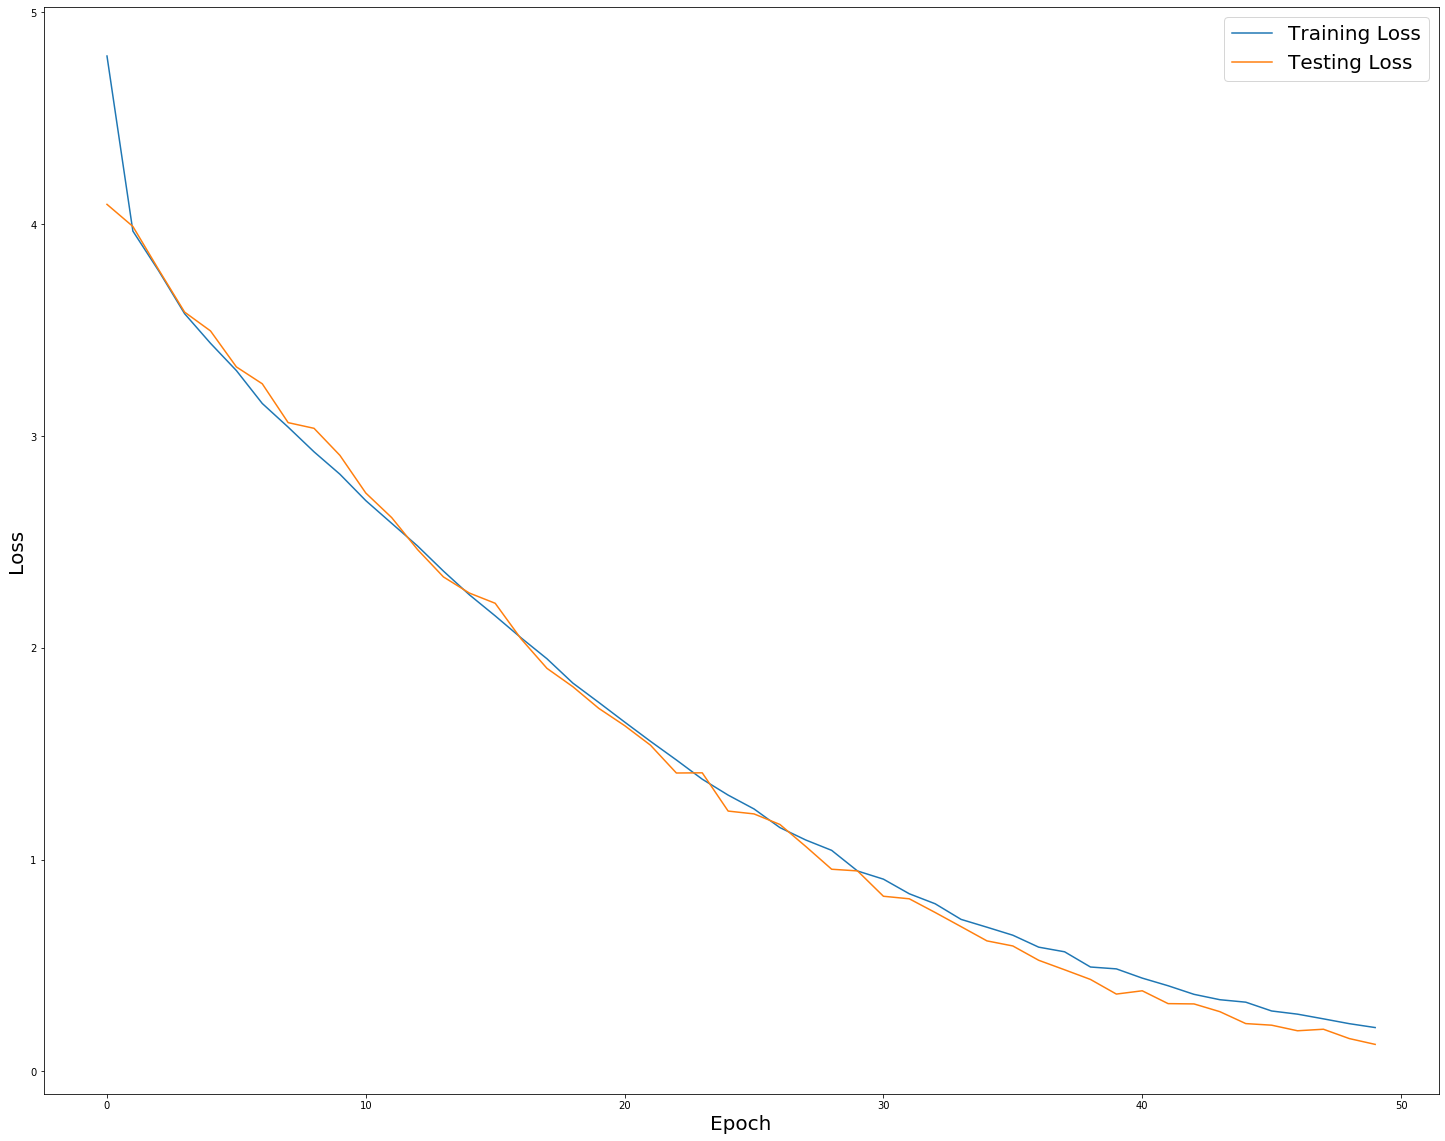

In [52]:
# Plot the training & testing loss.

plt.figure(figsize=(25, 20))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Testing Loss')
plt.xlabel('Epoch', fontsize=20)
plt.ylabel('Loss', fontsize=20)
plt.legend(loc = 'best', prop={'size': 20})
plt.show()


In [53]:
# Define word and index retrieval dictionaries.

reverse_target_word_index = y_tokenizer.index_word
reverse_source_word_index = x_tokenizer.index_word
target_word_index = y_tokenizer.word_index


In [54]:
# Define the encoder-decoder inference model.

# Encode the input sequence to get the feature vector
encoder_model = Model(inputs=encoder_inputs,outputs=[encoder_outputs, state_h, state_c])

# Decoder setup
# Below tensors will hold the states of the previous time step
decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_hidden_state_input = Input(shape=(max_text_len,latent_dim))

# Get the embeddings of the decoder sequence
dec_emb2= dec_emb_layer(decoder_inputs) 
# To predict the next word in the sequence, set the initial states to the states from the previous time step
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])

#attention inference
attn_out_inf, attn_states_inf = attn_layer([decoder_hidden_state_input, decoder_outputs2])
decoder_inf_concat = Concatenate(axis=-1, name='concat')([decoder_outputs2, attn_out_inf])

# A dense softmax layer to generate prob dist. over the target vocabulary
decoder_outputs2 = decoder_dense(decoder_inf_concat) 

# Final decoder model
decoder_model = Model(
    [decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c],
    [decoder_outputs2] + [state_h2, state_c2])


In [55]:
# Define the functions to retrieve original texts and summaries, and predicted summaries.


# Function to retrieve predicted summary.
def decode_sequence(input_seq):
    # Encode the input as state vectors.
    e_out, e_h, e_c = encoder_model.predict(input_seq)
    
    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1,1))
    
    # Populate the first word of target sequence with the start word.
    target_seq[0, 0] = target_word_index['sostok']

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition:
      
        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = reverse_target_word_index[sampled_token_index+1]
        
        if(sampled_token!='eostok'):
            decoded_sentence += ' '+sampled_token

        # Exit condition: either hit max length or find stop word.
        if (sampled_token == 'eostok'  or len(decoded_sentence.split()) >= (max_summary_len-1)):
            stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # Update internal states
        e_h, e_c = h, c    
        
    return decoded_sentence


# Function to retrieve original summary.
def seq2summary(input_seq):
    newString=''
    for i in input_seq:
        if((i!=0 and i!=target_word_index['sostok']) and i!=target_word_index['eostok']):
            newString=newString+reverse_target_word_index[i]+' '
    return newString


# Function to retrieve original text.
def seq2text(input_seq):
    newString=''
    for i in input_seq:
        if(i!=0):
            newString=newString+reverse_source_word_index[i]+' '
    return newString


In [33]:
# Print original vs predicted summaries.

print('Original Vs Predicted Summaries')

for i in range(len(x_tr)):
    
    print('\n\nBook Name\n', df2.iloc[i, 0])
    print("\nOriginal Summary\n", seq2summary(y_tr[i]))
    
    pred_summary = []
    ret_summary = list(decode_sequence(x_tr[i].reshape(1,max_text_len)).split(' '))
    for i in range(len(ret_summary)-1, -1, -1):
        if(ret_summary[i] != 'sostok'):
            pred_summary.append(ret_summary[i])
            
    pred_summary = pred_summary[::-1]
    pred_summary = ' '.join(pred_summary)   

    print("\nPredicted summary\n", pred_summary)


Original Vs Predicted Summaries


Book Name
 The Drunkard's Walk: How Randomness Rules Our Lives


NameError: name 'seq2summary' is not defined